In [77]:
# Carregamento das bibliotecas necessárias e do DataFrame pré-processado

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Carregue o DataFrame já limpo
try:
    caminho_carregar = '../data/processed/df_jogos_realizados.pkl'
    df_jogos_realizados = pd.read_pickle(caminho_carregar)
    print("DataFrame pré-processado 'df_jogos_realizados.pkl' carregado com sucesso!")
    print(f"O dataset contém {df_jogos_realizados.shape[0]} partidas e {df_jogos_realizados.shape[1]} colunas.")
except FileNotFoundError:
    print(f"ERRO: Arquivo {caminho_carregar} não encontrado.")
    print("Por favor, execute o notebook '01_Data_Preparation.ipynb' primeiro.")

df_jogos_realizados.head()

DataFrame pré-processado 'df_jogos_realizados.pkl' carregado com sucesso!
O dataset contém 4939 partidas e 9 colunas.


,rodada,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar
3846,1,2012-05-19,18:30,Palmeiras,Portuguesa,Empate,Pacaembu,1,1
3847,1,2012-05-19,18:30,Sport,Flamengo,Empate,Ilha do Retiro,1,1
3848,1,2012-05-19,21:00,Figueirense,Nautico,Figueirense,Orlando Scarpelli,2,1
3849,1,2012-05-20,16:00,Corinthians,Fluminense,Fluminense,Pacaembu,0,1
3850,1,2012-05-20,16:00,Internacional,Coritiba,Internacional,Beira Rio,2,0


In [78]:
# ==============================================================================
# Bloco 3: Cálculo das Métricas Gerais do Campeonato
# ==============================================================================

if 'df_jogos_realizados' in locals():
	# 1. Total de Gols Marcados
	df_jogos_realizados['total_gols'] = df_jogos_realizados['mandante_Placar'] + df_jogos_realizados['visitante_Placar']
	total_gols = df_jogos_realizados['total_gols'].sum()

	# 2. Total de Partidas
	total_partidas = len(df_jogos_realizados)

	# 3. Média de Gols por Partida
	media_gols_partida = total_gols / total_partidas

	# 4. Contagem de Vitórias (Mandante, Visitante) e Empates
	vitorias_mandante = df_jogos_realizados[df_jogos_realizados['vencedor'] == df_jogos_realizados['mandante']].shape[0]
	vitorias_visitante = df_jogos_realizados[df_jogos_realizados['vencedor'] == df_jogos_realizados['visitante']].shape[0]
	empates = df_jogos_realizados[df_jogos_realizados['vencedor'] == 'Empate'].shape[0]

	# 5. Calculando os Percentuais
	perc_vitoria_mandante = (vitorias_mandante / total_partidas) * 100
	perc_vitoria_visitante = (vitorias_visitante / total_partidas) * 100
	perc_empates = (empates / total_partidas) * 100

	# Exibindo os resultados de forma organizada
	print("--- Análise Geral do Campeonato (Dados de 2012 a 2024) ---")
	print("="*55)
	print(f"Total de Partidas Analisadas: {total_partidas}")
	print(f"Total de Gols Marcados: {total_gols}")
	print(f"Média de Gols por Partida: {media_gols_partida:.2f}")
	print("-"*55)
	print("Distribuição dos Resultados:")
	print(f"  - Vitórias do Mandante: {vitorias_mandante} ({perc_vitoria_mandante:.2f}%)")
	print(f"  - Vitórias do Visitante: {vitorias_visitante} ({perc_vitoria_visitante:.2f}%)")
	print(f"  - Empates: {empates} ({perc_empates:.2f}%)")
	print("="*55)
else:
	print("ERRO: O dataframe 'df_jogos_realizados' não está definido. Certifique-se de que o arquivo foi carregado e os dados foram preparados corretamente.")

--- Análise Geral do Campeonato (Dados de 2012 a 2024) ---
Total de Partidas Analisadas: 4939
Total de Gols Marcados: 11737
Média de Gols por Partida: 2.38
-------------------------------------------------------
Distribuição dos Resultados:
  - Vitórias do Mandante: 2390 (48.39%)
  - Vitórias do Visitante: 1220 (24.70%)
  - Empates: 1329 (26.91%)


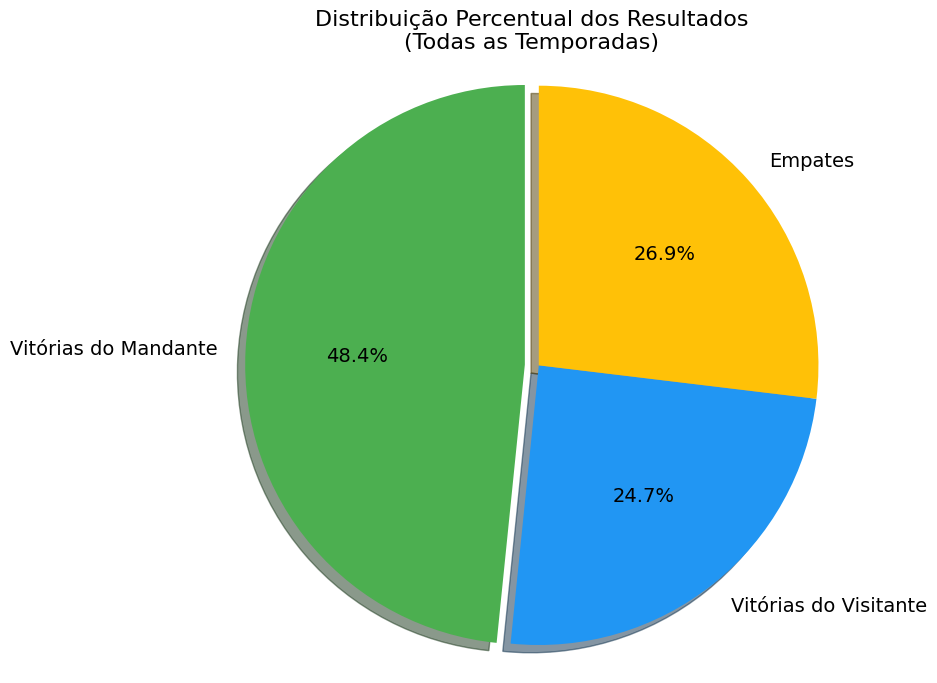

In [79]:
# ==============================================================================
# Bloco 4: Visualização Gráfica da Distribuição dos Resultados
# ==============================================================================
# Criando um gráfico de pizza para visualizar os percentuais

# Dados para o gráfico
labels = ['Vitórias do Mandante', 'Vitórias do Visitante', 'Empates']
sizes = [vitorias_mandante, vitorias_visitante, empates]
cores = ['#4CAF50', '#2196F3', '#FFC107'] # Verde, Azul, Amarelo
explode = (0.05, 0, 0)  # "Explodir" a primeira fatia para dar destaque

# Criando a figura e o eixo
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=cores, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Garante que o gráfico seja um círculo.

# Adicionando um título
plt.title('Distribuição Percentual dos Resultados\n(Todas as Temporadas)', fontsize=16)

# Mostrando o gráfico
plt.show()

In [80]:
# ==============================================================================
# Bloco 5: Cálculo do Desempenho Agregado por Equipe
# ==============================================================================
print("Iniciando a análise de desempenho por equipe...")

# Pegamos uma lista com o nome de todos os times únicos do dataset
times = pd.unique(df_jogos_realizados[['mandante', 'visitante']].values.ravel('K'))

# Lista para armazenar as estatísticas de cada time
stats_times = []

# Loop para calcular as estatísticas de cada time
for time in times:
    # Jogos como mandante
    jogos_mandante = df_jogos_realizados[df_jogos_realizados['mandante'] == time]
    # Jogos como visitante
    jogos_visitante = df_jogos_realizados[df_jogos_realizados['visitante'] == time]
    
    # Total de jogos
    total_jogos = len(jogos_mandante) + len(jogos_visitante)
    
    # Vitórias
    vitorias = (jogos_mandante['vencedor'] == time).sum() + (jogos_visitante['vencedor'] == time).sum()
    
    # Empates
    empates = (jogos_mandante['vencedor'] == '-').sum() + (jogos_visitante['vencedor'] == '-').sum()
    
    # Derrotas
    derrotas = total_jogos - vitorias - empates
    
    # Gols Marcados (Gols Pró)
    gols_pro = jogos_mandante['mandante_Placar'].sum() + jogos_visitante['visitante_Placar'].sum()
    
    # Gols Sofridos (Gols Contra)
    gols_contra = jogos_mandante['visitante_Placar'].sum() + jogos_visitante['mandante_Placar'].sum()
    
    # Saldo de Gols
    saldo_gols = gols_pro - gols_contra
    
    # Pontos
    pontos = (vitorias * 3) + empates
    
    # Adicionando o dicionário de stats à nossa lista
    stats_times.append({
        'Clube': time,
        'Pts': pontos,
        'J': total_jogos,
        'V': vitorias,
        'E': empates,
        'D': derrotas,
        'GP': gols_pro,
        'GC': gols_contra,
        'SG': saldo_gols
    })

# Criando um DataFrame com as estatísticas
df_performance = pd.DataFrame(stats_times)

# Ordenando o DataFrame pelos pontos (e depois saldo de gols e gols pró como critério de desempate)
df_performance = df_performance.sort_values(by=['Pts', 'SG', 'GP'], ascending=False).reset_index(drop=True)

print("\nTabela de desempenho agregado de todos os times (2012-2024) calculada com sucesso!")

# Exibindo os 10 times com melhor desempenho histórico
df_performance.head(10)

Iniciando a análise de desempenho por equipe...

Tabela de desempenho agregado de todos os times (2012-2024) calculada com sucesso!


,Clube,Pts,J,V,E,D,GP,GC,SG
0,Flamengo,708,494,236,0,258,733,538,195
1,Atletico-MG,675,493,225,0,268,718,553,165
2,Palmeiras,666,456,222,0,234,680,472,208
3,Sao Paulo,615,494,205,0,289,625,516,109
4,Gremio,609,456,203,0,253,598,467,131
5,Corinthians,609,494,203,0,291,602,474,128
6,Fluminense,585,494,195,0,299,610,568,42
7,Internacional,579,456,193,0,263,579,469,110
8,Santos,546,456,182,0,274,579,494,85
9,Athletico-PR,543,456,181,0,275,557,501,56


In [81]:
# ==============================================================================
# Bloco 6: Análise de Força - Desempenho como Mandante vs. Visitante
# ==============================================================================
print("Iniciando a análise de força ofensiva e defensiva (Casa vs. Fora)...")

# Lista para armazenar as estatísticas detalhadas
stats_detalhadas = []

# Usamos a lista de times que já tínhamos
for time in times:
    # --- Desempenho em CASA ---
    jogos_casa = df_jogos_realizados[df_jogos_realizados['mandante'] == time]
    gols_pro_casa = jogos_casa['mandante_Placar'].sum()
    gols_contra_casa = jogos_casa['visitante_Placar'].sum()
    num_jogos_casa = len(jogos_casa)
    
    # Média de Gols Marcados em Casa (evita divisão por zero se o time nunca jogou em casa)
    media_gp_casa = gols_pro_casa / num_jogos_casa if num_jogos_casa > 0 else 0
    # Média de Gols Sofridos em Casa
    media_gc_casa = gols_contra_casa / num_jogos_casa if num_jogos_casa > 0 else 0

    # --- Desempenho FORA ---
    jogos_fora = df_jogos_realizados[df_jogos_realizados['visitante'] == time]
    gols_pro_fora = jogos_fora['visitante_Placar'].sum()
    gols_contra_fora = jogos_fora['mandante_Placar'].sum()
    num_jogos_fora = len(jogos_fora)

    # Média de Gols Marcados Fora
    media_gp_fora = gols_pro_fora / num_jogos_fora if num_jogos_fora > 0 else 0
    # Média de Gols Sofridos Fora
    media_gc_fora = gols_contra_fora / num_jogos_fora if num_jogos_fora > 0 else 0
    
    stats_detalhadas.append({
        'Clube': time,
        'Média Gols Marcados (Casa)': media_gp_casa,
        'Média Gols Sofridos (Casa)': media_gc_casa,
        'Média Gols Marcados (Fora)': media_gp_fora,
        'Média Gols Sofridos (Fora)': media_gc_fora
    })

# Criando o DataFrame de Força
df_forca = pd.DataFrame(stats_detalhadas)

print("\nTabela de força ofensiva e defensiva calculada com sucesso!")

# Exibindo os 10 times com melhor média de gols marcados em casa
df_forca.sort_values(by='Média Gols Marcados (Casa)', ascending=False).head(20)

Iniciando a análise de força ofensiva e defensiva (Casa vs. Fora)...

Tabela de força ofensiva e defensiva calculada com sucesso!


,Clube,Média Gols Marcados (Casa),Média Gols Sofridos (Casa),Média Gols Marcados (Fora),Média Gols Sofridos (Fora)
0,Palmeiras,1.763158,0.894737,1.219298,1.175439
15,Atletico-MG,1.761134,0.943320,1.150407,1.300813
11,Flamengo,1.676113,0.906883,1.291498,1.271255
17,Santos,1.644737,0.868421,0.894737,1.298246
4,Internacional,1.609649,0.864035,0.929825,1.192982
18,Gremio,1.570175,0.833333,1.052632,1.214912
33,Bragantino,1.536842,1.000000,1.063158,1.400000
22,Athletico-PR,1.535088,0.846491,0.907895,1.350877
14,Sao Paulo,1.506073,0.813765,1.024291,1.275304
12,Portuguesa,1.500000,0.815789,0.842105,1.473684


In [82]:
# ==============================================================================
# Bloco 8: Criação da Variável Alvo (Target) para o Modelo
# ==============================================================================
print("Criando a variável alvo 'Over_2_5'...")

# A condição `df_jogos_realizados['total_gols'] > 2.5` retorna True ou False.
# O comando `.astype(int)` converte True para 1 e False para 0.
df_jogos_realizados['Over_2_5'] = (df_jogos_realizados['total_gols'] > 2.5).astype(int)

print("Variável alvo criada com sucesso!")

# Vamos verificar como ficou a distribuição entre jogos com mais e menos de 2.5 gols
distribuicao_over_under = df_jogos_realizados['Over_2_5'].value_counts(normalize=True) * 100

print("\nDistribuição dos Resultados:")
print(f"  - Partidas com Menos de 2.5 gols (0): {distribuicao_over_under[0]:.2f}%")
print(f"  - Partidas com Mais de 2.5 gols (1): {distribuicao_over_under[1]:.2f}%")


# Exibindo as últimas colunas do DataFrame para vermos o resultado
df_jogos_realizados[['mandante', 'visitante', 'mandante_Placar', 'visitante_Placar', 'total_gols', 'Over_2_5']].head()

Criando a variável alvo 'Over_2_5'...
Variável alvo criada com sucesso!

Distribuição dos Resultados:
  - Partidas com Menos de 2.5 gols (0): 56.91%
  - Partidas com Mais de 2.5 gols (1): 43.09%


,mandante,visitante,mandante_Placar,visitante_Placar,total_gols,Over_2_5
3846,Palmeiras,Portuguesa,1,1,2,0
3847,Sport,Flamengo,1,1,2,0
3848,Figueirense,Nautico,2,1,3,1
3849,Corinthians,Fluminense,0,1,1,0
3850,Internacional,Coritiba,2,0,2,0


C:\Users\Pedro\AppData\Local\Temp\ipykernel_6432\1921651653.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Over_2_5', data=df_jogos_realizados, palette=['#FFC107', '#4CAF50'])
C:\Users\Pedro\AppData\Local\Temp\ipykernel_6432\1921651653.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Menos de 2.5 Gols', 'Mais de 2.5 Gols']) # Customizando os nomes no eixo X


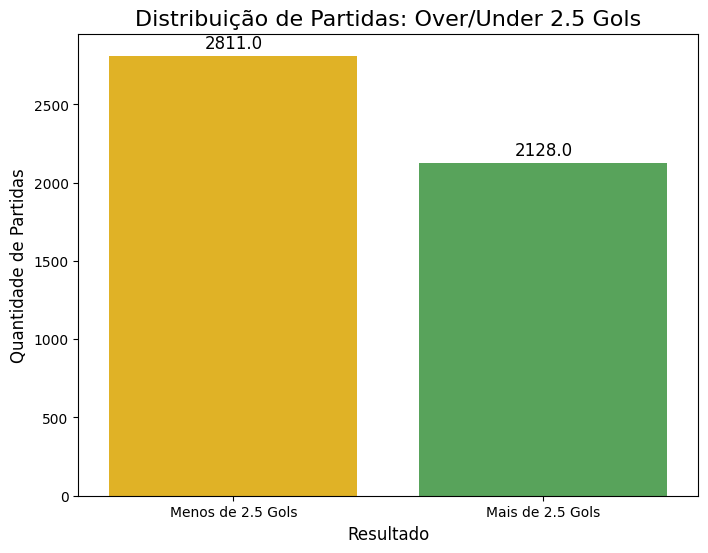

In [83]:
# ==============================================================================
# Bloco 9: Visualização da Distribuição da Variável Alvo
# ==============================================================================
# Um gráfico de barras é ótimo para ver o balanço das nossas classes

# Criando a figura
plt.figure(figsize=(8, 6))

# Criando o gráfico com o Seaborn
ax = sns.countplot(x='Over_2_5', data=df_jogos_realizados, palette=['#FFC107', '#4CAF50'])

# Adicionando título e rótulos
plt.title('Distribuição de Partidas: Over/Under 2.5 Gols', fontsize=16)
plt.ylabel('Quantidade de Partidas', fontsize=12)
plt.xlabel('Resultado', fontsize=12)
ax.set_xticklabels(['Menos de 2.5 Gols', 'Mais de 2.5 Gols']) # Customizando os nomes no eixo X

# Adicionando os valores no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)


plt.show()

In [84]:
# ==============================================================================
# Bloco 10: Unindo Features e Target para Criar o Dataset do Modelo
# ==============================================================================
print("Iniciando a montagem do dataset final...")

# Primeiro, vamos preparar nosso dataframe de força para a junção
# Definimos o 'Clube' como índice para facilitar a busca de dados
df_forca_map = df_forca.set_index('Clube')

# --- Features do Mandante ---
# Usamos .map() para buscar a Média de Gols Marcados (Casa) de cada time mandante
df_jogos_realizados['mandante_media_GP_casa'] = df_jogos_realizados['mandante'].map(df_forca_map['Média Gols Marcados (Casa)'])
# E a Média de Gols Sofridos (Casa)
df_jogos_realizados['mandante_media_GC_casa'] = df_jogos_realizados['mandante'].map(df_forca_map['Média Gols Sofridos (Casa)'])

# --- Features do Visitante ---
# Usamos .map() para buscar a Média de Gols Marcados (Fora) de cada time visitante
df_jogos_realizados['visitante_media_GP_fora'] = df_jogos_realizados['visitante'].map(df_forca_map['Média Gols Marcados (Fora)'])
# E a Média de Gols Sofridos (Fora)
df_jogos_realizados['visitante_media_GC_fora'] = df_jogos_realizados['visitante'].map(df_forca_map['Média Gols Sofridos (Fora)'])

print("Métricas de força adicionadas a cada partida com sucesso!")

# --- Criação do DataFrame final do Modelo ---
# Selecionamos apenas as colunas que nosso modelo irá usar: as 4 features e o nosso alvo.
colunas_modelo = [
    'mandante_media_GP_casa',
    'mandante_media_GC_casa',
    'visitante_media_GP_fora',
    'visitante_media_GC_fora',
    'Over_2_5' # Nosso alvo!
]

df_modelo = df_jogos_realizados[colunas_modelo].copy()

# Removemos qualquer linha que possa ter ficado com dados faltantes (se algum time não tiver stats)
df_modelo.dropna(inplace=True)

print("\nDataFrame final para o treinamento do modelo foi criado!")
print(f"Ele contém {df_modelo.shape[0]} jogos e {df_modelo.shape[1]} colunas.")

# Exibindo as primeiras linhas do nosso dataset final pronto para o modelo
df_modelo.head(20)

Iniciando a montagem do dataset final...
Métricas de força adicionadas a cada partida com sucesso!

DataFrame final para o treinamento do modelo foi criado!
Ele contém 4939 jogos e 5 colunas.


,mandante_media_GP_casa,mandante_media_GC_casa,visitante_media_GP_fora,visitante_media_GC_fora,Over_2_5
3846,1.763158,0.894737,0.842105,1.473684,0
3847,1.243421,0.960526,1.291498,1.271255,0
3848,1.131579,1.078947,0.552632,2.157895,1
3849,1.481781,0.781377,1.004049,1.348178,0
3850,1.609649,0.864035,0.912281,1.818713,0
3851,1.377990,0.990431,1.024291,1.275304,1
3852,1.284211,0.989474,1.150407,1.300813,0
3853,1.473684,0.910526,0.859649,1.614035,0
3854,1.278947,0.978947,0.894737,1.298246,0
3855,1.233918,1.216374,1.052632,1.214912,1


In [85]:
# ==============================================================================
# Bloco 10.1: Criando a Feature 'Expectativa Total de Gols'
# ==============================================================================

if 'df_modelo' in locals():
    print("Criando a nova feature 'expectativa_total_gols'...")

    # Passo 1: Calcular o potencial de cada time no confronto
    potencial_mandante = df_modelo['mandante_media_GP_casa'] + df_modelo['visitante_media_GC_fora']
    potencial_visitante = df_modelo['visitante_media_GP_fora'] + df_modelo['mandante_media_GC_casa']

    # Passo 2: Somar os dois potenciais para criar a feature final
    df_modelo['expectativa_total_gols'] = potencial_mandante + potencial_visitante

    print("Feature 'expectativa_total_gols' criada com sucesso!")

    # Exibindo o resultado com a nova coluna no final
    print("\nDataFrame com a nova feature:")
    display(df_modelo.head())
else:
    print("ERRO: O DataFrame 'df_modelo' não foi encontrado. Execute o Bloco 10 primeiro.")

Criando a nova feature 'expectativa_total_gols'...
Feature 'expectativa_total_gols' criada com sucesso!

DataFrame com a nova feature:


,mandante_media_GP_casa,mandante_media_GC_casa,visitante_media_GP_fora,visitante_media_GC_fora,Over_2_5,expectativa_total_gols
3846,1.763158,0.894737,0.842105,1.473684,0,4.973684
3847,1.243421,0.960526,1.291498,1.271255,0,4.766700
3848,1.131579,1.078947,0.552632,2.157895,1,4.921053
3849,1.481781,0.781377,1.004049,1.348178,0,4.615385
3850,1.609649,0.864035,0.912281,1.818713,0,5.204678


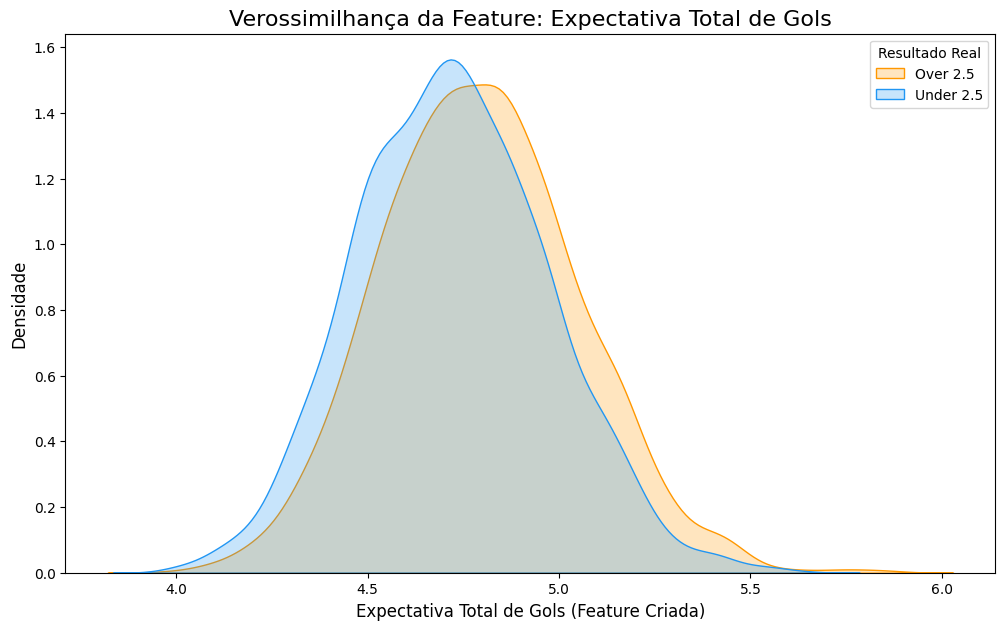

In [86]:
# ==============================================================================
# Bloco 10.2: Gráfico de Verossimilhança da Nova Feature
# ==============================================================================

# Verificamos se o df_modelo e a nova coluna existem antes de tentar plotar
if 'df_modelo' in locals() and 'expectativa_total_gols' in df_modelo.columns:
    
    # Define o tamanho da figura
    plt.figure(figsize=(12, 7))

    # Cria o Gráfico de Densidade (KDE Plot) com o Seaborn
    # x -> A feature que queremos analisar
    # hue -> A coluna que vai separar as cores (nosso alvo)
    sns.kdeplot(data=df_modelo, x='expectativa_total_gols', hue='Over_2_5',
                fill=True,          # Preenche a área sob a curva para melhor visualização
                common_norm=False,  # Garante que a área de cada curva some 1, comparando as formas
                palette=['#2196F3', '#FF9800']) # Paleta de cores (Azul para Under, Laranja para Over)

    # Adiciona títulos e rótulos para clareza
    plt.title('Verossimilhança da Feature: Expectativa Total de Gols', fontsize=16)
    plt.xlabel('Expectativa Total de Gols (Feature Criada)', fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    
    # Adiciona uma legenda personalizada
    plt.legend(title='Resultado Real', labels=['Over 2.5', 'Under 2.5'])

    # Mostra o gráfico
    plt.show()

else:
    print("ERRO: O DataFrame 'df_modelo' ou a coluna 'expectativa_total_gols' não foram encontrados.")
    print("Por favor, execute o Bloco 10.1 primeiro.")

In [89]:
# ==============================================================================
# Bloco Final do Notebook 02: Criação de Todas as Features e Salvamento
# ==============================================================================

if 'df_jogos_realizados' in locals() and 'df_forca' in locals():
    
    # --- ETAPA 1: Criação das 4 Features Base ---
    print("Iniciando a criação das features base de média da temporada...")
    df_forca_map = df_forca.set_index('Clube')
    df_jogos_realizados['mandante_media_GP_casa'] = df_jogos_realizados['mandante'].map(df_forca_map['Média Gols Marcados (Casa)'])
    df_jogos_realizados['mandante_media_GC_casa'] = df_jogos_realizados['mandante'].map(df_forca_map['Média Gols Sofridos (Casa)'])
    df_jogos_realizados['visitante_media_GP_fora'] = df_jogos_realizados['visitante'].map(df_forca_map['Média Gols Marcados (Fora)'])
    df_jogos_realizados['visitante_media_GC_fora'] = df_jogos_realizados['visitante'].map(df_forca_map['Média Gols Sofridos (Fora)'])
    
    # --- ETAPA 2: Criação do DataFrame do Modelo ---
    print("\nCriando o DataFrame 'df_modelo'...")
    colunas_base_modelo = [
        'mandante_media_GP_casa', 'mandante_media_GC_casa',
        'visitante_media_GP_fora', 'visitante_media_GC_fora',
        'Over_2_5'
    ]
    df_modelo = df_jogos_realizados[colunas_base_modelo].copy()
    df_modelo.dropna(inplace=True)
    
    # --- ETAPA 3: Engenharia de Features de Interação ---
    print("\nCriando novas features de interação...")
    df_modelo['potencial_gols_mandante'] = df_modelo['mandante_media_GP_casa'] + df_modelo['visitante_media_GC_fora']
    df_modelo['potencial_gols_visitante'] = df_modelo['visitante_media_GP_fora'] + df_modelo['mandante_media_GC_casa']
    df_modelo['expectativa_total_gols'] = df_modelo['potencial_gols_mandante'] + df_modelo['potencial_gols_visitante']
    df_modelo['diferenca_forca'] = df_modelo['potencial_gols_mandante'] - df_modelo['potencial_gols_visitante']
    print("Novas features de interação criadas com sucesso!")
    display(df_modelo.head())

    # --- ETAPA 4: Salvando o DataFrame Final e Completo ---
    caminho_salvar_modelo = '../data/processed/df_model_ready.pkl'
    df_modelo.to_pickle(caminho_salvar_modelo)
    print(f"\n✅ DataFrame final (com 8 features + alvo) pronto para modelagem salvo em: {caminho_salvar_modelo}")

else:
    print("ERRO: 'df_jogos_realizados' ou 'df_forca' não estão definidos. Execute os blocos anteriores do Notebook 02.")

Iniciando a criação das features base de média da temporada...

Criando o DataFrame 'df_modelo'...

Criando novas features de interação...
Novas features de interação criadas com sucesso!


,mandante_media_GP_casa,mandante_media_GC_casa,visitante_media_GP_fora,visitante_media_GC_fora,Over_2_5,potencial_gols_mandante,potencial_gols_visitante,expectativa_total_gols,diferenca_forca
3846,1.763158,0.894737,0.842105,1.473684,0,3.236842,1.736842,4.973684,1.500000
3847,1.243421,0.960526,1.291498,1.271255,0,2.514676,2.252024,4.766700,0.262652
3848,1.131579,1.078947,0.552632,2.157895,1,3.289474,1.631579,4.921053,1.657895
3849,1.481781,0.781377,1.004049,1.348178,0,2.829960,1.785425,4.615385,1.044534
3850,1.609649,0.864035,0.912281,1.818713,0,3.428363,1.776316,5.204678,1.652047



✅ DataFrame final (com 8 features + alvo) pronto para modelagem salvo em: ../data/processed/df_model_ready.pkl
